# Loan Prediction



## About Data


| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|

In [1]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# get training data
data = pd.read_csv("train.csv")

In [3]:
# top rows of training Dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [5]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

data.drop(['ApplicantIncome'], axis=1, inplace=True)
data.drop(['CoapplicantIncome'], axis=1, inplace=True)

In [6]:
data.shape

(614, 11)

### summary of numerical variables for training data set

In [7]:
data.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,592.000000,600.00000,564.000000,614.000000
mean,146.412162,342.00000,0.842199,7024.705081
std,85.587325,65.12041,0.364878,6458.663872
min,9.000000,12.00000,0.000000,1442.000000
25%,100.000000,360.00000,1.000000,4166.000000
50%,128.000000,360.00000,1.000000,5416.500000
75%,168.000000,360.00000,1.000000,7521.750000
max,700.000000,480.00000,1.000000,81000.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender              601 non-null object
Married             611 non-null object
Dependents          599 non-null object
Education           614 non-null object
Self_Employed       582 non-null object
LoanAmount          592 non-null float64
Loan_Amount_Term    600 non-null float64
Credit_History      564 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
TotalIncome         614 non-null float64
dtypes: float64(4), object(7)
memory usage: 52.8+ KB


In [9]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

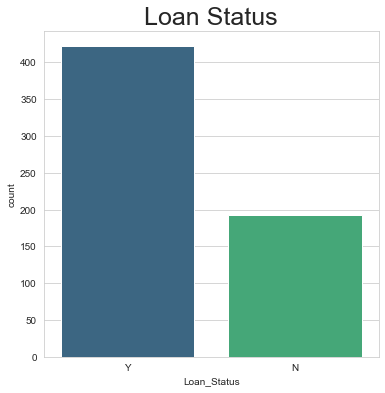

In [10]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x="Loan_Status", data=data, palette="viridis")
plt.title('Loan Status', fontsize= 25)
plt.show()

In [11]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
pd.crosstab(data['Credit_History'], data['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [13]:
378/475

0.7957894736842105

79% of the loan approved people have credit score 1

In [14]:
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

In [15]:
approved_loans = data[data['Loan_Status']==1]['TotalIncome'].values


rejected_loans = data[data['Loan_Status']==0]['TotalIncome'].values

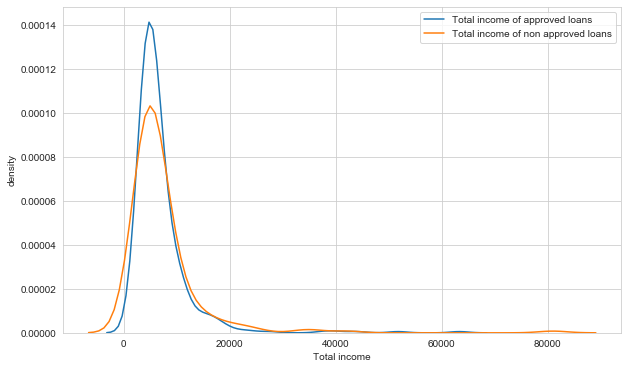

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(approved_loans, hist=False, label="Total income of approved loans")
sns.distplot(rejected_loans, hist=False, label="Total income of non approved loans")
plt.xlabel('Total income')
plt.ylabel('density')
plt.legend()
plt.show()

In [17]:
approved_gender = data[data['Loan_Status']==1]['Gender'].values


rejected_gender = data[data['Loan_Status']==0]['Gender'].values

In [18]:
pd.crosstab(data['Gender'], data['Loan_Status'], margins=True)

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


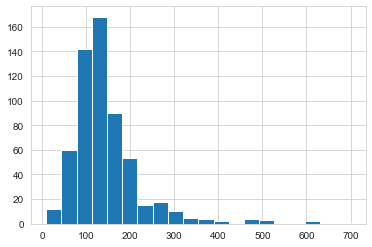

In [19]:
data['LoanAmount'].hist(bins=20)

## Preparing data

In [20]:
data['Self_Employed'].fillna('No',inplace=True)

In [21]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [22]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [23]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [24]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [25]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [26]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)

In [27]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
TotalIncome         0
dtype: int64

In [28]:
data['Credit_History'] = data['Credit_History'].astype(object)

In [29]:
continuous_data= [] 
categorical_data= []

for i in data.columns:
    if data[i].dtype == 'object':
        categorical_data.append(i)
    elif data[i].dtype == 'float':
        continuous_data.append(i)

In [30]:
continuous_data

['LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

In [31]:
categorical_data

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [32]:
#from sklearn.preprocessing import Normalizer

#normalizer = Normalizer()

#data[continuous_data] = normalizer.fit_transform(data[continuous_data])

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,128.0,360.0,1,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1,Urban,1,6000.0


In [34]:
from sklearn.preprocessing import LabelEncoder

for cat in categorical_data:
    le = LabelEncoder()
    data[cat]=le.fit_transform(data[cat].astype('str'))

In [35]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,128.0,360.0,1,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1,2,1,3000.0
3,1,1,0,1,0,120.0,360.0,1,2,1,4941.0
4,1,0,0,0,0,141.0,360.0,1,2,1,6000.0


In [36]:
data.shape

(614, 11)

In [37]:
data.to_csv('preprocessed.csv', index=False)

In [38]:
df = pd.read_csv('preprocessed.csv')

y = df['Loan_Status']
X=df.drop(['Loan_Status'], axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='gini',
            max_depth=5, max_features='auto',
            min_samples_leaf=1, min_samples_split=2,
              n_estimators=150, n_jobs=-1)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy score is:",accuracy)

Accuracy score is: 0.7621621621621621


In [41]:
import pickle
pickle.dump(rfc, open("model.pkl","wb"))

In [42]:
X_test.head(1)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
411,1,1,0,0,0,160.0,360.0,1,2,6256.0


In [48]:
a= [['1','1','2','0','0','2000','12','1','1','4528']]

rfc.predict(a)

array([1], dtype=int64)

In [50]:
with open("model.pkl", 'rb') as file:
    pickle_model = pickle.load(file)
    
pickle_model.predict(a)

array([1], dtype=int64)